## Tutorial example

In [ ]:
import scanpy as sc
adata = sc.datasets.pbmc68k_reduced()

In [ ]:
adata.shape

In [ ]:
adata.X

In [ ]:
import numpy as np
np.unique(adata.obs['bulk_labels'])

In [ ]:
markers = ['C1QA', 'PSAP', 'CD79A', 'CD79B', 'CST3', 'LYZ']
sc.pl.stacked_violin(adata, markers, groupby='bulk_labels', dendrogram=True)
# bulk labels are the cell types

In [ ]:
markers = {'T-cell': 'CD3D', 'B-cell': 'CD79A', 'myeloid': 'CST3'}
sc.pl.stacked_violin(adata, markers, groupby='bulk_labels', dendrogram=True)

In [ ]:
vp = sc.pl.stacked_violin(adata, markers, 'bulk_labels', return_fig=True)
vp.add_totals().style(ylim=(0,5)).show()

In [ ]:
axes_dict = vp.get_axes()

## B cells

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# import the whole dataset
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\GSE164378\Hao_PBMC_GSE164378.h5ad")
adata.shape

(161764, 33538)

In [12]:
types = np.unique(adata.obs['celltype.l1']).tolist()
types = [x.replace(' ', '_') for x in types]
types

['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [4]:
# read in the features selected for B cells
bcell_features_df = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_GSE\L1_by_lossdiff\feature_selection\B_features.txt", sep='\t', names=['Gene', 'Weight', 'Tendency'])
bcell_features_df

,Gene,Weight,Tendency
0,S100A4,-0.175108,0
1,IGKC,0.393831,1
2,CD74,0.322328,1
3,HLA-DRA,0.035293,1
4,ACTB,-0.063162,0
5,TMSB4X,-0.440034,0
6,MS4A1,0.824803,1
7,FTH1,-0.107447,0
8,MALAT1,-0.319360,0
9,IGHM,0.035283,1


In [5]:
all_features = bcell_features_df['Gene'].tolist()
print(all_features)
positive_features = bcell_features_df[bcell_features_df['Tendency'] == 1]['Gene'].tolist()
print(positive_features)

['S100A4', 'IGKC', 'CD74', 'HLA-DRA', 'ACTB', 'TMSB4X', 'MS4A1', 'FTH1', 'MALAT1', 'IGHM', 'B2M', 'CD79A', 'IGLC2']
['IGKC', 'CD74', 'HLA-DRA', 'MS4A1', 'IGHM', 'CD79A', 'IGLC2']


In [6]:
B_feature_dict = {'B': positive_features}

         Falling back to preprocessing with `sc.pp.pca` and default params.


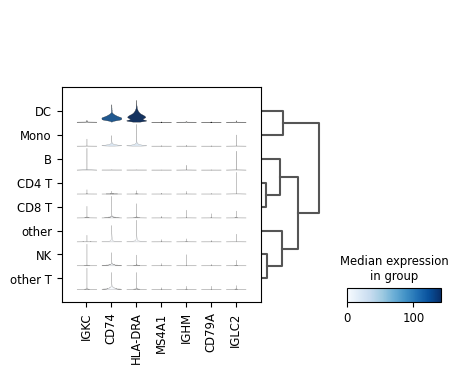

In [7]:
sc.pl.stacked_violin(adata, positive_features, groupby='celltype.l1', dendrogram=True)

categories: B, CD4 T, CD8 T, etc.
var_group_labels: B


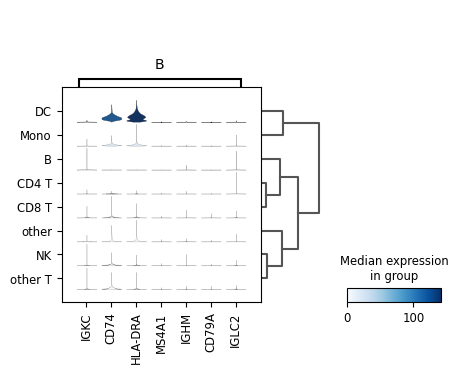

In [8]:
sc.pl.stacked_violin(adata, B_feature_dict, groupby='celltype.l1', dendrogram=True)

In [9]:
B_feature_dict_2 = {'B_positive': positive_features, 'B_negative': [f for f in all_features if f not in positive_features]}
B_feature_dict_2

{'B_positive': ['IGKC', 'CD74', 'HLA-DRA', 'MS4A1', 'IGHM', 'CD79A', 'IGLC2'],
 'B_negative': ['S100A4', 'ACTB', 'TMSB4X', 'FTH1', 'MALAT1', 'B2M']}

categories: B, CD4 T, CD8 T, etc.
var_group_labels: B_positive, B_negative


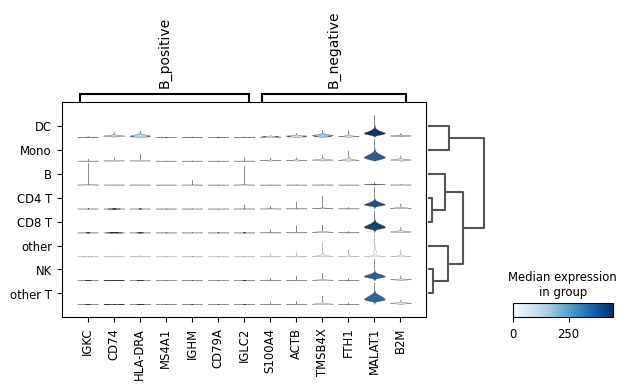

In [10]:
sc.pl.stacked_violin(adata, B_feature_dict_2, groupby='celltype.l1', dendrogram=True)

## Level 1 celltype

In [11]:
# abundance plot function for Level 1 cell types
def abundance_plot(adata, celltype, features_df, mode='positive'):
    all_features = features_df['Gene'].tolist()
    positive_features = features_df[features_df['Tendency'] == 1]['Gene'].tolist()
    negative_features = [f for f in all_features if f not in positive_features]

    if mode == 'positive':
        feature_dict = {celltype: positive_features}
    elif mode == 'all':
        feature_dict = {celltype + '_positive': positive_features, celltype + '_negative': negative_features}
    else:
        print('mode not recognized')
        return
    
    sc.pl.stacked_violin(adata, feature_dict, groupby='celltype.l1', dendrogram=True)

categories: B, CD4 T, CD8 T, etc.
var_group_labels: B


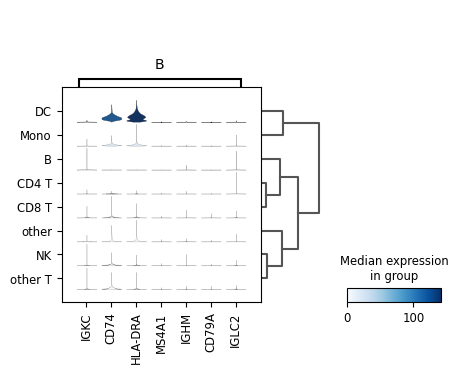

categories: B, CD4 T, CD8 T, etc.
var_group_labels: B_positive, B_negative


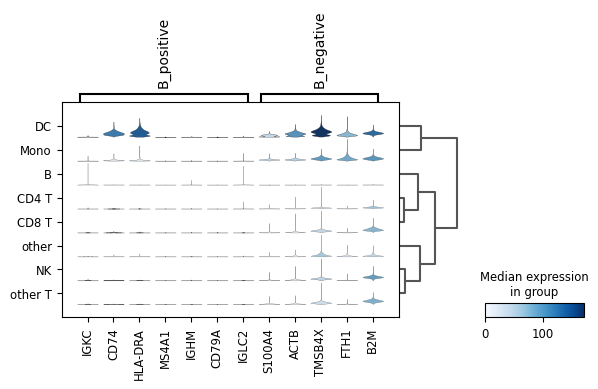

categories: B, CD4 T, CD8 T, etc.
var_group_labels: CD4_T


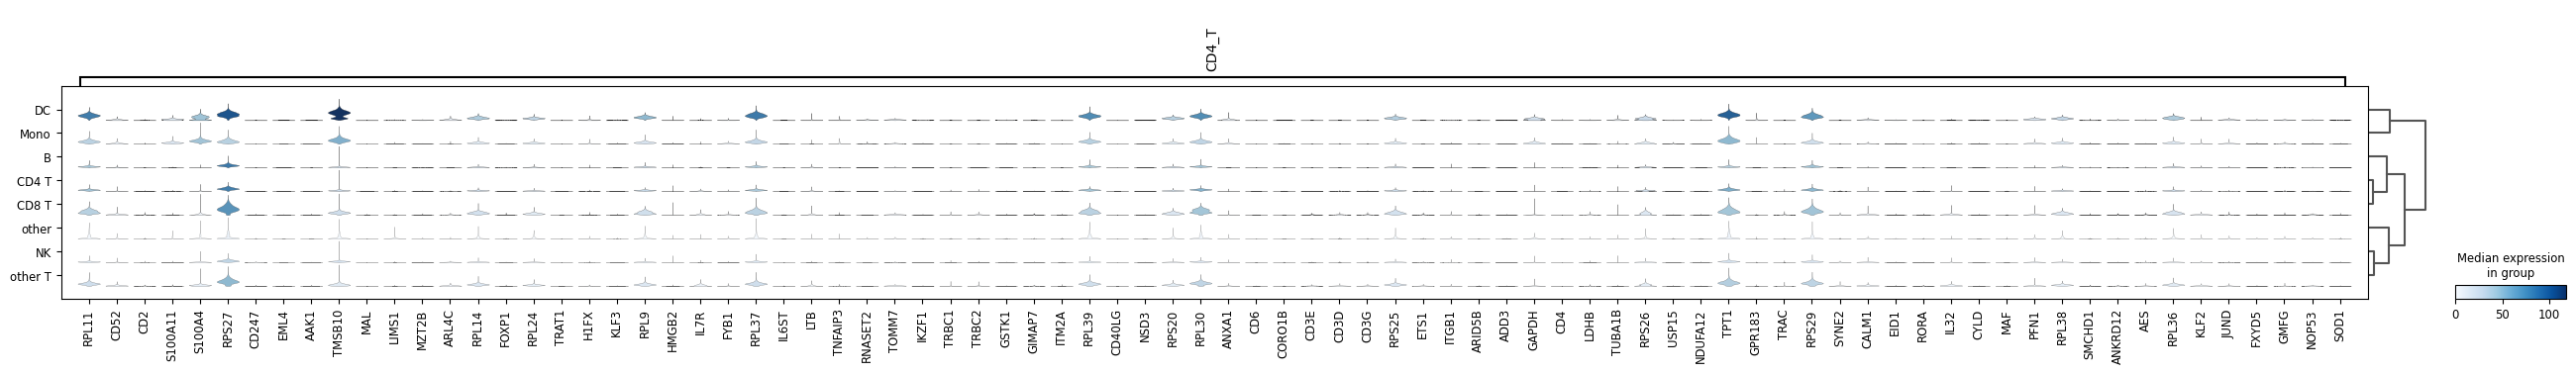

categories: B, CD4 T, CD8 T, etc.
var_group_labels: CD4_T_positive, CD4_T_negative


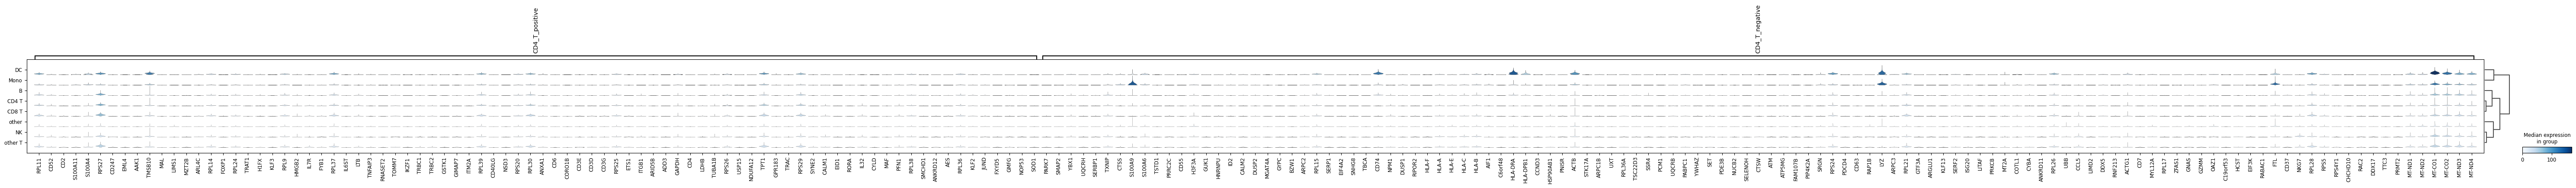

categories: B, CD4 T, CD8 T, etc.
var_group_labels: CD8_T


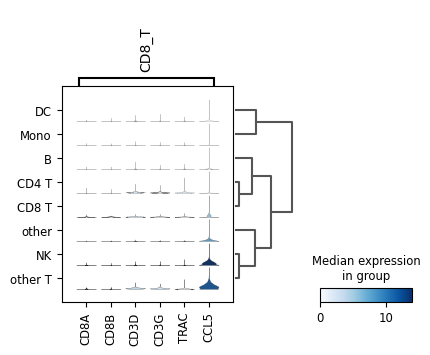

categories: B, CD4 T, CD8 T, etc.
var_group_labels: CD8_T_positive, CD8_T_negative


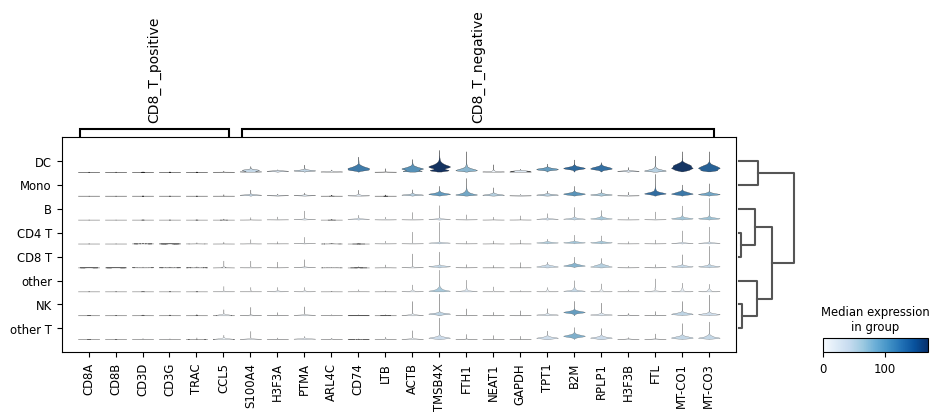

categories: B, CD4 T, CD8 T, etc.
var_group_labels: DC


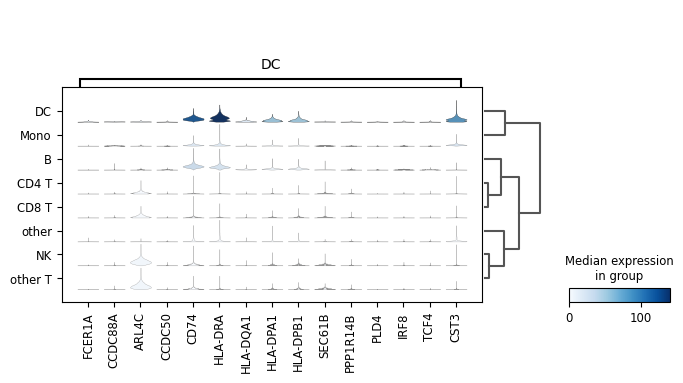

categories: B, CD4 T, CD8 T, etc.
var_group_labels: DC_positive, DC_negative


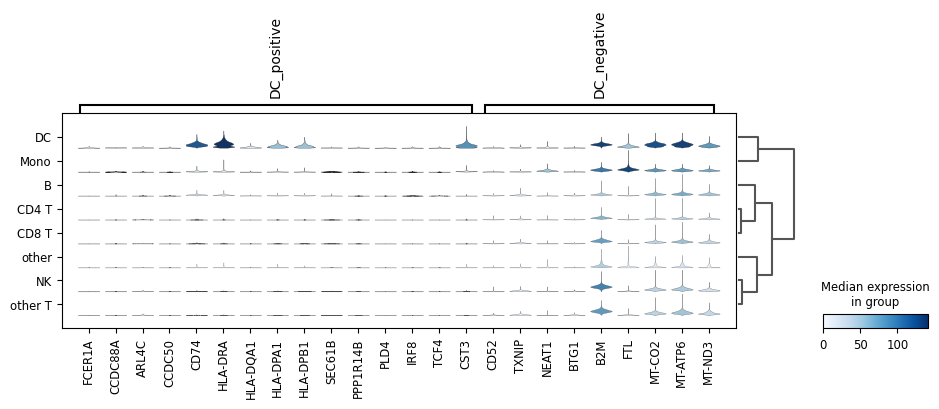

categories: B, CD4 T, CD8 T, etc.
var_group_labels: Mono


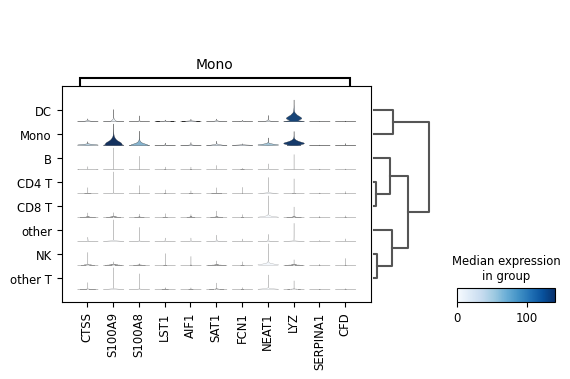

categories: B, CD4 T, CD8 T, etc.
var_group_labels: Mono_positive, Mono_negative


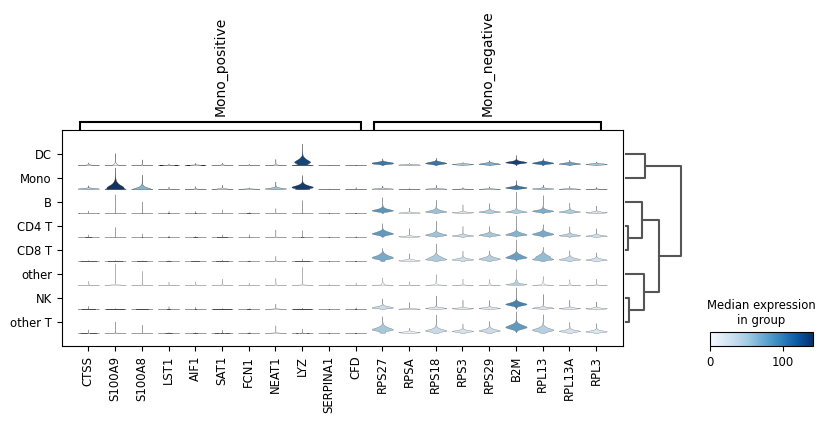

categories: B, CD4 T, CD8 T, etc.
var_group_labels: NK


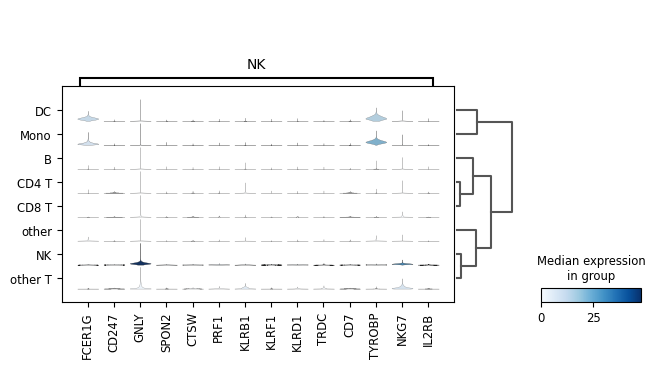

categories: B, CD4 T, CD8 T, etc.
var_group_labels: NK_positive, NK_negative


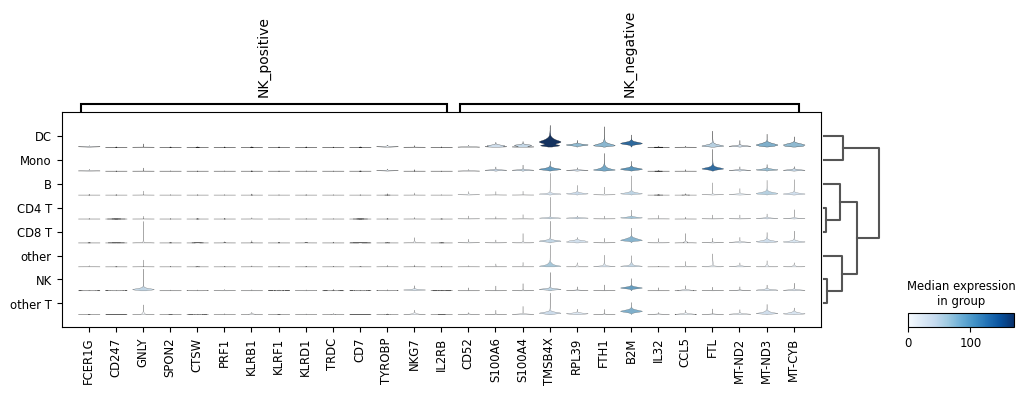

categories: B, CD4 T, CD8 T, etc.
var_group_labels: other


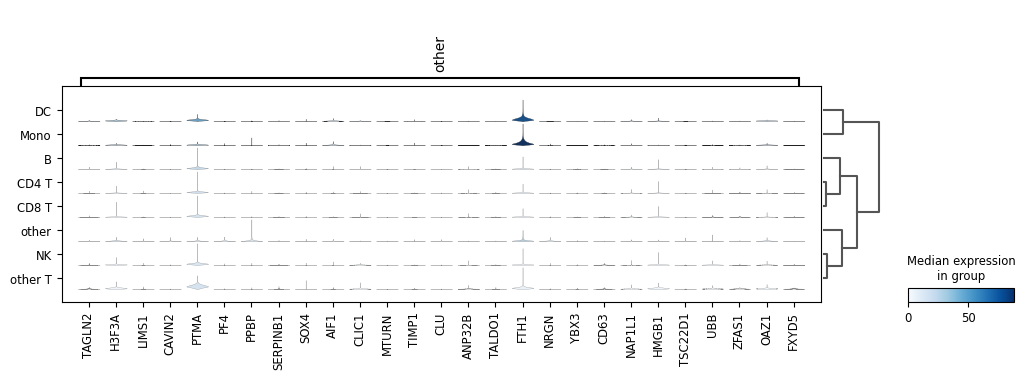

categories: B, CD4 T, CD8 T, etc.
var_group_labels: other_positive, other_negative


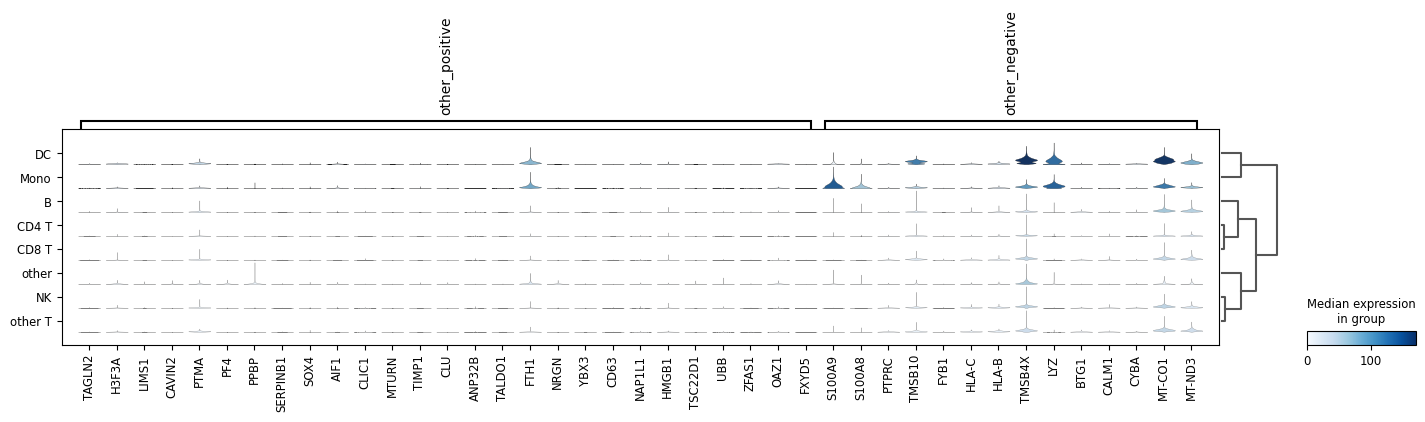

categories: B, CD4 T, CD8 T, etc.
var_group_labels: other_T


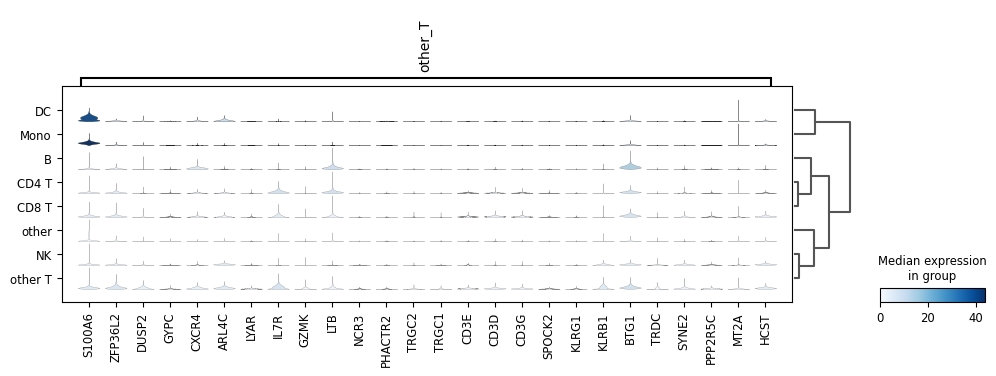

categories: B, CD4 T, CD8 T, etc.
var_group_labels: other_T_positive, other_T_negative


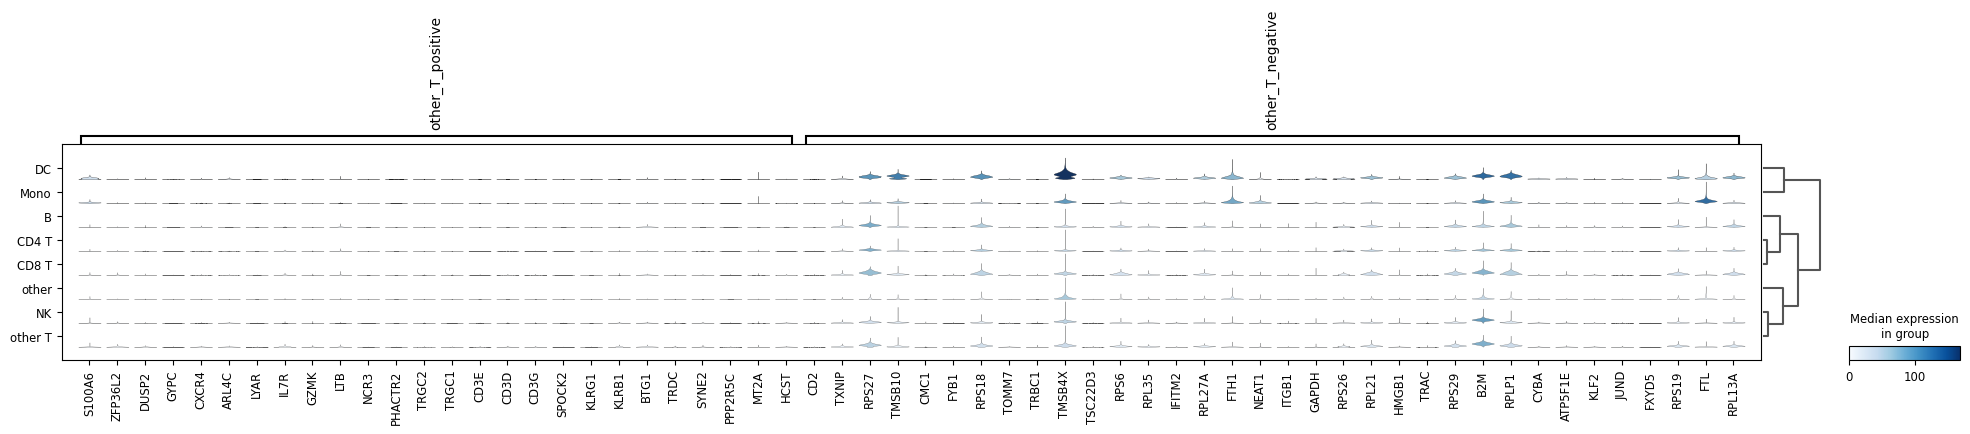

In [16]:
# Remove 'MALAT1' housekeeping gene from the list of features
for celltype in types:
    path = r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_GSE\L1_by_lossdiff\feature_selection\{}_features.txt".format(celltype)
    features_df = pd.read_csv(path, sep='\t', names=['Gene', 'Weight', 'Tendency'])
    features_df = features_df[features_df['Gene'] != 'MALAT1']
    abundance_plot(adata, celltype, features_df, mode='positive')
    abundance_plot(adata, celltype, features_df, mode='all')
